<a href="https://colab.research.google.com/github/RaivoKasepuu/BDA_Tartu_MTAT_03_319/blob/master/BDA2021Fall_HW7_Raivo_Kasepuu_Maarja_Parve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 07  </font></center></h1>
<h2><center> <font color='black'> A/B Testing</font></center></h2>   
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Fall 2021</font></center></h2>
</div>


# Homework instructions
- Please name your homeworks in the following format **BDAFall2021_HWX_Name_Surname.ipynb** then it will be easier to grade your homeworks and smaller possibility for a human mistake.
- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**15 December at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- For coding related questions, do submit your code as well as your explanation/answer.

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- Please <font color='red'>do not change</font> the template of this notebook file. You can download the .ipynb file and work on that.

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name: Raivo Kasepuu</font>&emsp;   <font color='red'>Student ID: B710710</font>


<font color='red'>Name: Maarja Parve</font>&emsp;   <font color='red'>Student ID: B99902</font>

#Question 1 (3 points)

Use ab_clicks.csv data and find whether Learn, Help, and Services versions of the Montana University web page have a significantly different number of clicks compared to the Interact version.




In [ ]:
print("Hello! The semester is coming to an end and here we have the last BDA homework done by Maarja and Raivo!")
print("Let's start testing and distributing and check the normality")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
%matplotlib inline 

#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)


# set plot style for all plots
plt.style.use('ggplot')

Hello! The semester is coming to an end and here we have the last BDA homework done by Maarja and Raivo!
Let's start testing and distributing and check the normality


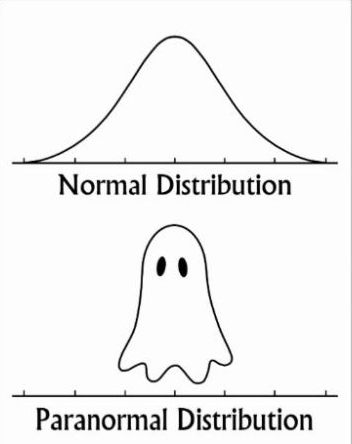

## Question 1.1(0.2p)
Remove Tag_name == area from the data. 


In [ ]:
print("Time to upload the final dataset and see what we got here")
df = pd.read_csv('ab_clicks.csv', sep='\t')
df.head(100)

Time to upload the final dataset and see what we got here


,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
...,...,...,...,...,...,...
95,15,div,"Explore the world, explore the past Science & ...",3,True,Connect
96,47,span,nav-item-dot,3,True,Connect
97,49,a,nav-item,3,True,Connect
98,65,form,Search,3,True,Connect


In [ ]:
print("What is it that we have here?")
df.info()

What is it that we have here?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Element_ID  299 non-null    int64 
 1   Tag_name    299 non-null    object
 2   Name        299 non-null    object
 3   No_clicks   299 non-null    int64 
 4   Visible     299 non-null    bool  
 5   Version     299 non-null    object
dtypes: bool(1), int64(2), object(3)
memory usage: 12.1+ KB


In [ ]:
print("Of course we have to make sure if the dataset is clean first")
df.isnull().sum()

Of course we have to make sure if the dataset is clean first


Element_ID    0
Tag_name      0
Name          0
No_clicks     0
Visible       0
Version       0
dtype: int64

In [ ]:
print("Let´s check what unique values the columns have \n")
print(f"We have {len(df.Element_ID.unique())} unique html elements \n")

print(f"There are these tags: \n\n {df.Tag_name.unique()} \n")
print(f"Values for feature Visible: {df.Visible.unique()} \n")

print(f"Number of versions is {len(df.Version.unique())}: {df.Version.unique()}")

Let´s check what unique values the columns have 

We have 108 unique html elements 

There are these tags: 

 ['area' 'a' 'input' 'button' 'span' 'p' 'div' 'form' 'img' 'ul' 'li'
 'object' 'center' 'strong' 'font'] 

Values for feature Visible: [False  True] 

Number of versions is 5: ['Interact' 'Connect' 'Learn' 'Help' 'Services']


We need to look at the amount of the clicks on the sites versions and have a nice plot
Here we can see that the Interact version has the most overall clicks


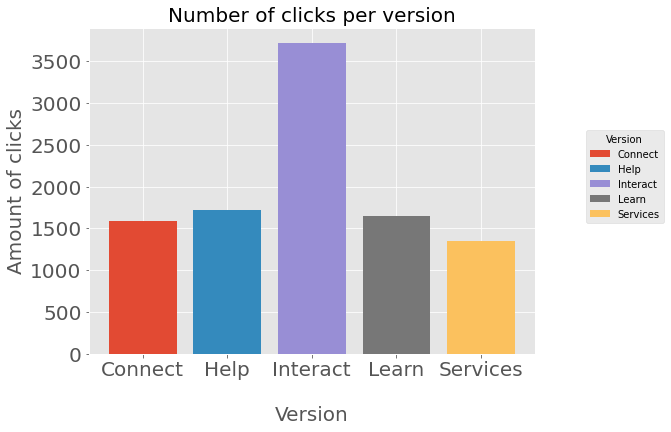

In [ ]:
print('We need to look at the amount of the clicks on the sites versions and have a nice plot')
print('Here we can see that the Interact version has the most overall clicks')

# group data by Version
groups = df.groupby('Version')

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))

clicks =[]
# plot line for each customer 
for Version, group in groups:
    ax.bar(group.Version, sum(group.No_clicks), label=Version)
    clicks.append(sum(group.No_clicks))
    
# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.3, 0.7), title="Version",)

 # set titles for figure, x, y

plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

Now we need to look at specific buttons per versions and see it in our own colour
This should give us the first impression if we can find the winner straight away


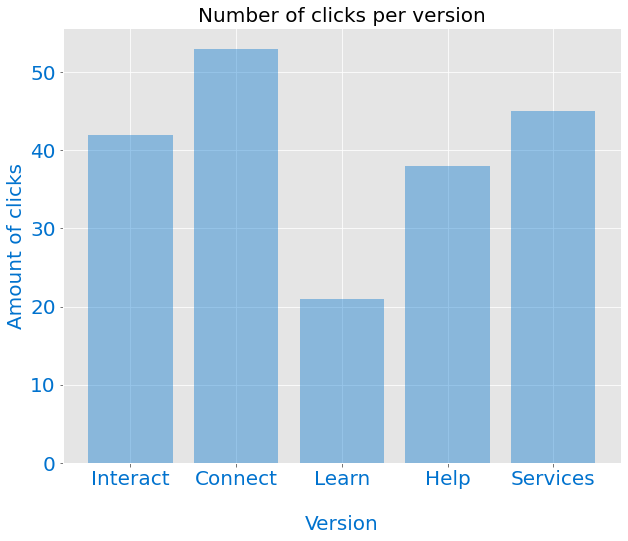

We still have to do the testing because it does not confirm which version is the best


In [ ]:
print('Now we need to look at specific buttons per versions and see it in our own colour')
print('This should give us the first impression if we can find the winner straight away')
btn_names = ["INTERACT", "LEARN", "CONNECT", "HELP", "SERVICES"]

buttons_df = df[df['Name'].isin(btn_names)]


# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(buttons_df.Version, buttons_df.No_clicks, color='#0072ce', alpha = 0.4)
    
    
# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20, color='#0072ce')
plt.ylabel('Amount of clicks',fontsize=20, color='#0072ce')


plt.xticks(fontsize = 20, color='#0072ce') 
plt.yticks(fontsize = 20, color='#0072ce') 
plt.grid(True)
plt.show()

print('We still have to do the testing because it does not confirm which version is the best')

In [ ]:
print('For analysis we need to remove the Tag_name == area from the data')
df_filter =  df['Tag_name']!='area'
df_filter = df[df_filter]
df_filter



For analysis we need to remove the Tag_name == area from the data


,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
...,...,...,...,...,...,...
294,116,div,Â© MSU About MSU Library Accessibility Contact...,1,True,Services
295,130,div,lib.montana.edu/interact/,1,False,Services
296,131,center,lib.montana.edu/hours/,1,False,Services
297,132,font,ì§€ì €ê·€ë‹¤,1,False,Services


##Question 1.2 (2.8p)
Apply two-sided t-test (scipy.stats.ttest_ind() function) to check whether the means of clicks on different versions of the web page are significantly different. Use a significance level of 0.05 when deciding on rejecting or accepting the null hypothesis. In the end, you need to do 3 tests of differences in clicks between such pairs of web page versions: (Learn, Interact), (Help, Interact), (Services, Interact). 
Interpret the results.

In [ ]:
print("We need to apply the two-sided t-tests to check whether the means of clicks on different versions of the web page are significantly different.")
print("Our Null hypothesis is, that there is no difference between Version A: Interact and version B: 1. Learn, 2. Help, 3. Services")

We need to apply the two-sided t-tests to check whether the means of clicks on different versions of the web page are significantly different.
Our Null hypothesis is, that there is no difference between Version A: Interact and version B: 1. Learn, 2. Help, 3. Services


In [ ]:
print("First let's get only data about first two versions: Interact, and Learn")
df_interact_learn = (df_filter['Version']=='Interact') | (df_filter['Version']=='Learn')
df_interact_learn = df_filter[df_interact_learn]

#df_interact_learn.head(10)

First let's get only data about first two versions: Interact, and Learn


In [ ]:
print("Testing...testing...Test No 1")
from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

sample1_interact = df_interact_learn[df_interact_learn['Version']=='Interact']
sample2_learn = df_interact_learn[df_interact_learn['Version']=='Learn']


twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_learn['No_clicks'])

if twosample_results[1] < 0.05:
    s = "Reject the Null Hypothesis"
else:
    s = "Accept the Null Hypothesis"

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

Testing...testing...Test No 1


In [ ]:
print("For the second comparison let's get only data aboutthe next two versions: Interact, and Help")
df_interact_help = (df_filter['Version']=='Interact') | (df_filter['Version']=='Help')
df_interact_help = df_filter[df_interact_help]

#df_interact_help.head(10)

For the second comparison let's get only data aboutthe next two versions: Interact, and Help


In [ ]:
print("Testing...testing...Test No 2")
from plotly.figure_factory import create_table as ct

sample1_interact_2 = df_interact_help[df_interact_help['Version']=='Interact']
sample2_help = df_interact_help[df_interact_help['Version']=='Help']


twosample_results_2 = stats.ttest_ind(sample1_interact_2['No_clicks'], sample2_help['No_clicks'])

if twosample_results_2[1] < 0.05:
    s = "Reject the Null Hypothesis"
else:
    s = "Accept the Null Hypothesis"

matrix_twosample_2 = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results_2[0], twosample_results_2[1], s]
]

twosample_table_2 = ct(matrix_twosample_2, index=True)
twosample_table_2

Testing...testing...Test No 2


In [ ]:
print("And as the last duo let's get only data about the last pair of versions: Interact, and Services")
df_interact_services = (df_filter['Version']=='Interact') | (df_filter['Version']=='Services')
df_interact_services = df_filter[df_interact_services]

#df_interact_services.head(10)

And as the last duo let's get only data about the last pair of versions: Interact, and Services


In [ ]:
print("Testing...testing...Test No 3")
from plotly.figure_factory import create_table as ct

sample1_interact_3 = df_interact_services[df_interact_services['Version']=='Interact']
sample2_services = df_interact_services[df_interact_services['Version']=='Services']


twosample_results_3 = stats.ttest_ind(sample1_interact_3['No_clicks'], sample2_services['No_clicks'])

if twosample_results_3[1] < 0.05:
    s = "Reject the Null Hypothesis"
else:
    s = "Accept the Null Hypothesis"

matrix_twosample_3 = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results_3[0], twosample_results_3[1], s]
]

twosample_table_3 = ct(matrix_twosample_3, index=True)
twosample_table_3

Testing...testing...Test No 3


# Question 2 (4 points)
Check whether the number of clicks on Montana University follows the normal distribution.
##Question 2.1 (2p)
Get the number of clicks of the Help web page version and check whether they are normally distributed by building the distribution plot and QQ-plot. Explain why the data is/isn't following the normal distribution.


We need to get the number of clicks of the Help page version and check whether they are normally distributed
First, the distribution plot


Text(0.5, 1.0, 'Distribution of No_clicks of Help page version')

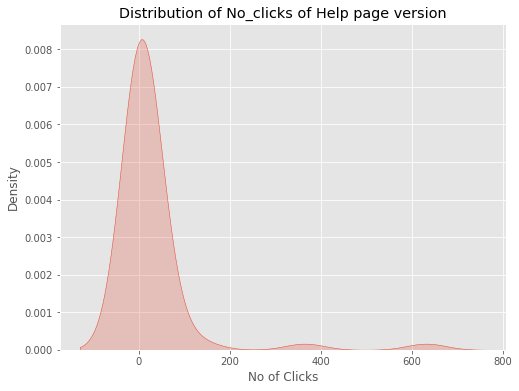

In [ ]:
print("We need to get the number of clicks of the Help page version and check whether they are normally distributed")
print("First, the distribution plot")
fig, ax = plt.subplots(figsize=(8, 6))


ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)

   
#ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
#ax.set_xscale('log')
ax.set_title('Distribution of No_clicks of Help page version')

Another way to visualise the distribution


Text(0.5, 1.0, 'Distribution of No_clicks of Help page version')

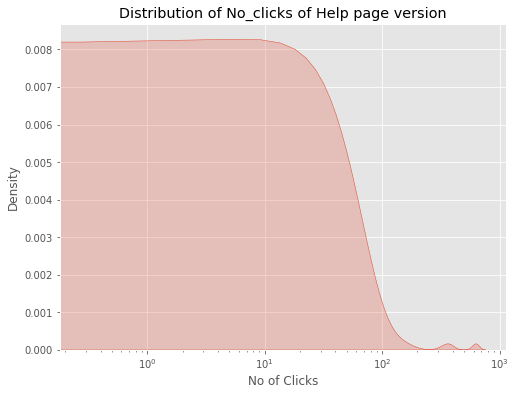

In [ ]:
print("Another way to visualise the distribution")
fig, ax = plt.subplots(figsize=(8, 6))


ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)


#ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks of Help page version')

Second, the QQ-plot


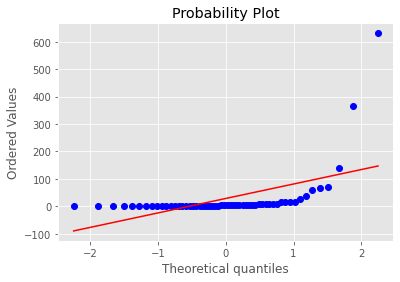

In [ ]:
print("Second, the QQ-plot")

import scipy.stats as stats

stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Help'], dist="norm", plot=plt)


plt.show()

In [ ]:
print("The data of the Help version is not normally distributed because it does now follow the standard deviation percentages")
print("Also the angle on QQ-plot is not 45 degrees as it should be if the data had normal distribution")

The data of the Help version is not normally distributed because it does now follow the standard deviation percentages
Also the angle on QQ-plot is not 45 degrees as it should be if the data had normal distribution


##Question 2.2 (2p)
Get the number of clicks of the Services web page version and check whether they are normally distributed by building the distribution plot and QQ-plot. Explain why the data is/isn't following the normal distribution.

We need to get the number of clicks of the Services page version and check whether they are normally distributed
First, the distribution plot for Services Page


Text(0.5, 1.0, 'Distribution of No_clicks of Services page version')

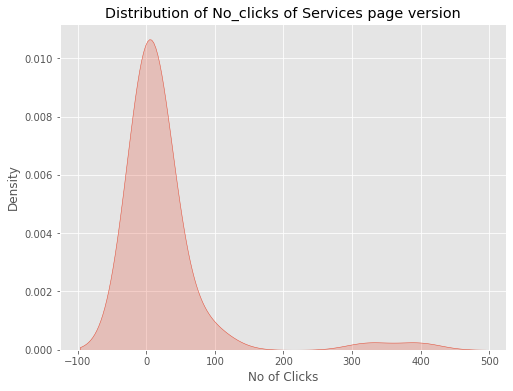

In [ ]:
print("We need to get the number of clicks of the Services page version and check whether they are normally distributed")
print("First, the distribution plot for Services Page")
fig, ax = plt.subplots(figsize=(8, 6))


ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                ax =ax,  shade= True)

   
#ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
#ax.set_xscale('log')
ax.set_title('Distribution of No_clicks of Services page version')

Another way to visualise the Services version page clicks distribution


Text(0.5, 1.0, 'Distribution of No_clicks of Services page version')

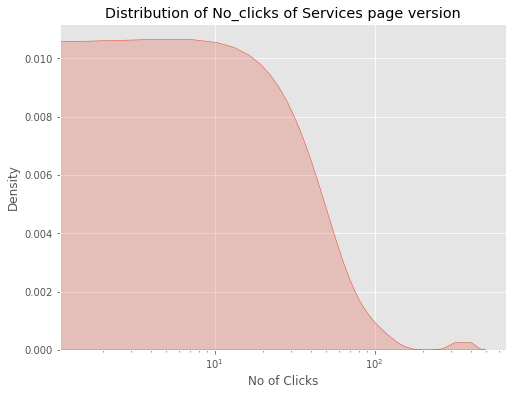

In [ ]:
print("Another way to visualise the Services version page clicks distribution")
fig, ax = plt.subplots(figsize=(8, 6))


ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                ax =ax,  shade= True)


#ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks of Services page version')

And also the QQ-plot for the Services page version


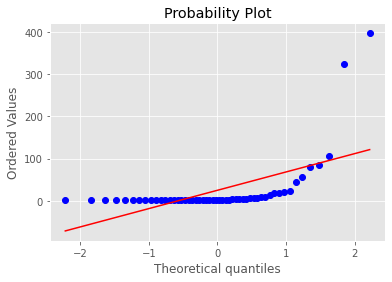

In [ ]:
print("And also the QQ-plot for the Services page version")

import scipy.stats as stats

stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Services'], dist="norm", plot=plt)


plt.show()

In [ ]:
print("The data for the Services page version isn't normally distributed because it does now follow the standard deviation percentages")
print("Also the angle on QQ-plot is not 45 degrees as it should be if the data had normal distribution")

The data for the Services page version isn't normally distributed because it does now follow the standard deviation percentages
Also the angle on QQ-plot is not 45 degrees as it should be if the data had normal distribution


# Question 3 (3 points)

Read about Multiple comparison problem [An Overview of Methods to Address the Multiple Comparison Problem](https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92). Summarize what the problem is, when we need to do something about it and how to solve it. 

    



With multiple comparisons you have to set multiple null hypotheses and the probability of erroneously rejecting at least 1 null hypothesis grows with each hypothesis.
Each hypothesis will have an individual α*, which represents the type 1 error rate for that particular test. As the number of hypotheses increases, so too does the overall α for the set of tests because the individual α's accumulate. 

So, we want to control othe type 1 error. We can approach this in two different ways.
1. Control overall α (also known as family-wise error rate or FWER), which will affect the α* for each test. That is, we are controlling the overall probability of making at least one false discovery. Bonferroni and Sidak corrections all control FWER.
2. Control false discovery rate (FDR). Where FWER controls for the probability for making a type 1 error at all, these procedures allow for type 1 errors (false positives) but control the proportion of these false positives in relation to true positives. This is done by adjusting the decision made for the p-value associated with each individual test to decide rejection or not. Because this will result in a higher type 1 error rate, it has higher power. This affords a higher probability of true discoveries. The step procedures control for FDR.

The article also gives a brief overview of available correction procedures for multiple comparisons.

# How complicate the homework was (from 0 to 10)?

We would grade it for about 6 out of 10

# How many hours you spent for this homework?

We spent about 6 hours including watching the lecture video and lab video (multiple times :))